In [1]:
from os import path
from glob import glob
from tqdm import tqdm
import torch

In [2]:
model = torch.hub.load('harritaylor/torchvggish', 'vggish')
model.eval()
root = './total'
filenames = glob(path.join(root,'*.wav'))
# save file test
result = torch.zeros((2871,3,128))
# torch.save(result,'waveoutvggish.pt')
# result = torch.load('waveoutvggish.pt')

Using cache found in /root/.cache/torch/hub/harritaylor_torchvggish_master


In [ ]:
for idx, data in enumerate(tqdm(filenames)):
    result[idx] = model.forward(data)
torch.save(result,'waveoutvggish.pt')

 57%|█████▋    | 1645/2871 [03:35<25:55,  1.27s/it]

In [2]:
result = torch.load('waveoutvggish.pt')
result2 = torch.load('waveoutvggish2.pt')
result3 = torch.load('waveoutvggish3.pt')

In [3]:
result[1000:2000] = result2[:1000]

In [4]:
result[2000:] = result3[:871]

In [5]:
print(torch.mean(result,0))

tensor([[175.0000,   8.0150, 146.9809,  96.6381, 215.0000,  76.0000,  77.0000,
         129.9418, 148.0000, 175.0000, 151.0000,  50.9997, 120.0000, 147.0000,
         100.9996,  35.0000, 109.2515, 239.0648, 197.0742, 194.3145,   0.0000,
         208.0226,  99.0073, 178.0902,  69.0885, 152.6576, 150.1689, 185.9028,
         123.5378,  68.2334, 193.7238, 131.4761, 106.2006,  81.9073, 140.0000,
         130.7106, 138.7872, 120.3720, 184.3302, 136.2045, 114.7997, 174.5733,
          31.2926, 143.3065, 123.7217, 164.1533, 132.9986,  91.6803, 124.9202,
         110.5259, 126.7673,  93.8098, 128.3048,  78.0756,  85.9993, 150.1588,
         124.7335, 105.6587, 113.6419, 205.9167, 129.1877, 122.0355, 121.3608,
          96.3163, 175.1996, 167.3877,  81.0526, 125.9937, 144.7074, 135.0812,
         146.9039, 111.5134, 127.9105, 187.9833, 139.6054, 154.6475, 132.7677,
         137.8722,  92.5622, 168.2598,  99.3117, 194.6155, 152.9996, 131.6102,
          92.2010, 101.9279, 139.4145, 202.5399, 147

In [6]:
torch.save(result,'vggishwavout.pt')

In [7]:
vec_result = result.reshape((2871,-1))

In [8]:
vec_result.size()

torch.Size([2871, 384])

In [67]:
print(torch.mean(vec_result,0))
mean_vec = torch.mean(vec_result,0)

tensor([175.0000,   8.0150, 146.9809,  96.6381, 215.0000,  76.0000,  77.0000,
        129.9418, 148.0000, 175.0000, 151.0000,  50.9997, 120.0000, 147.0000,
        100.9996,  35.0000, 109.2515, 239.0648, 197.0742, 194.3145,   0.0000,
        208.0226,  99.0073, 178.0902,  69.0885, 152.6576, 150.1689, 185.9028,
        123.5378,  68.2334, 193.7238, 131.4761, 106.2006,  81.9073, 140.0000,
        130.7106, 138.7872, 120.3720, 184.3302, 136.2045, 114.7997, 174.5733,
         31.2926, 143.3065, 123.7217, 164.1533, 132.9986,  91.6803, 124.9202,
        110.5259, 126.7673,  93.8098, 128.3048,  78.0756,  85.9993, 150.1588,
        124.7335, 105.6587, 113.6419, 205.9167, 129.1877, 122.0355, 121.3608,
         96.3163, 175.1996, 167.3877,  81.0526, 125.9937, 144.7074, 135.0812,
        146.9039, 111.5134, 127.9105, 187.9833, 139.6054, 154.6475, 132.7677,
        137.8722,  92.5622, 168.2598,  99.3117, 194.6155, 152.9996, 131.6102,
         92.2010, 101.9279, 139.4145, 202.5399, 147.1292,  87.76

In [10]:
dist_vec = torch.cdist(mean_vec.reshape(1,-1), vec_result)
print(dist_vec)

tensor([[ 8.3666,  8.3066,  8.1548,  ..., 10.5357, 12.3085,  8.9722]],
       grad_fn=<ViewBackward>)


In [11]:
torch.min(dist_vec)

tensor(5.3385, grad_fn=<MinBackward1>)

In [12]:
torch.max(dist_vec)

tensor(28.1869, grad_fn=<MaxBackward1>)

In [13]:
np_dist_vec = dist_vec.detach().numpy()[0]

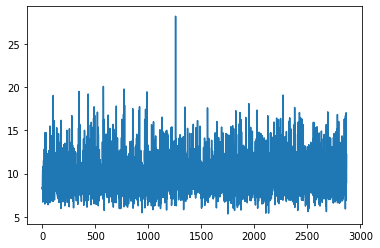

In [14]:
import matplotlib.pyplot as plt
plt.plot(np_dist_vec)

In [15]:
for idx, data in enumerate(np_dist_vec):
    if data > 19:
        print(idx)

104
348
433
577
773
988
1258
2272


In [16]:
nomalize_vec = np_dist_vec / max(np_dist_vec)

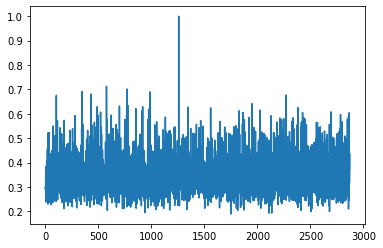

In [17]:
plt.plot(nomalize_vec)

In [75]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.9:
        print(idx)

1258


In [76]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.8:
        print(idx)

1258


In [74]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.7:
        print(idx)

577
773
1258


In [18]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.6:
        print(idx)

104
348
433
490
521
577
699
773
777
854
914
918
975
988
1258
1347
1559
1826
1863
1866
1949
2026
2272
2381
2426
2693
2866


In [91]:
c = 0
for idx, data in enumerate(nomalize_vec):
    if data > 0.375:
#         print(idx)
        c+=1
print(c)

969


In [46]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(vec_result.detach().numpy())
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [70]:
kmeans.cluster_centers_

array([[175.      ,   8.001568, 146.98851 ,  96.5627  , 215.      ,
         76.      ,  77.      , 129.9953  , 148.      , 175.      ,
        151.      ,  51.      , 120.      , 147.      , 101.      ,
         35.      , 109.087776, 239.24817 , 197.0883  , 194.41588 ,
          0.      , 208.01254 ,  99.003136, 178.1374  ,  69.00627 ,
        152.75392 , 150.22937 , 185.97963 , 123.55277 ,  68.264366,
        193.80408 , 131.64159 , 106.202194,  81.88192 , 140.      ,
        130.59352 , 138.7466  , 120.22048 , 184.45193 , 136.17189 ,
        114.68652 , 174.5815  ,  31.278997, 143.1233  , 123.91484 ,
        164.21786 , 133.00104 ,  91.599266, 125.21212 , 110.51045 ,
        126.83752 ,  93.764366, 128.12225 ,  78.11128 ,  86.      ,
        150.01045 , 124.516716, 105.574715, 113.8302  , 205.92633 ,
        128.9253  , 122.0559  , 121.27952 ,  96.05329 , 175.38402 ,
        167.15517 ,  80.85319 , 126.35737 , 144.86938 , 135.08516 ,
        147.01724 , 111.2628  , 128.05121 , 187.

In [69]:
kmeans.cluster_centers_.shape

(2, 384)

In [71]:
mean_vec.detach().numpy()

array([175.       ,   8.014977 , 146.98085  ,  96.63811  , 215.       ,
        76.       ,  77.       , 129.94183  , 148.       , 175.       ,
       151.       ,  50.999653 , 120.       , 147.       , 100.99965  ,
        35.       , 109.25148  , 239.06479  , 197.07419  , 194.31453  ,
         0.       , 208.02264  ,  99.00732  , 178.09021  ,  69.08847  ,
       152.65761  , 150.16893  , 185.90282  , 123.53779  ,  68.23337  ,
       193.72379  , 131.47614  , 106.20063  ,  81.90735  , 140.       ,
       130.71056  , 138.78719  , 120.371994 , 184.3302   , 136.20445  ,
       114.79972  , 174.57332  ,  31.292582 , 143.30652  , 123.7217   ,
       164.15326  , 132.99861  ,  91.68025  , 124.920235 , 110.52595  ,
       126.76733  ,  93.80982  , 128.30478  ,  78.075584 ,  85.999306 ,
       150.15883  , 124.73354  , 105.65865  , 113.64194  , 205.91675  ,
       129.18774  , 122.03553  , 121.36085  ,  96.31627  , 175.19958  ,
       167.38766  ,  81.0526   , 125.99373  , 144.70741  , 135.0

In [68]:
mean_vec.detach().numpy().shape

(384,)

In [73]:
kmeans.cluster_centers_[1] - mean_vec.detach().numpy()

array([ 0.00000000e+00,  2.68201828e-02, -1.53350830e-02,  1.50817871e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.06933594e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.98089600e-04,
        0.00000000e+00,  0.00000000e+00, -6.94274902e-04,  0.00000000e+00,
        3.27415466e-01, -3.66775513e-01, -2.82135010e-02, -2.02728271e-01,
        0.00000000e+00,  2.02026367e-02,  8.35418701e-03, -9.43908691e-02,
        1.64405823e-01, -1.92611694e-01, -1.20864868e-01, -1.53594971e-01,
       -2.99530029e-02, -6.19964600e-02, -1.60568237e-01, -3.30886841e-01,
       -3.13568115e-03,  5.08575439e-02,  0.00000000e+00,  2.34069824e-01,
        8.11462402e-02,  3.03031921e-01, -2.43469238e-01,  6.51397705e-02,
        2.26402283e-01, -1.63726807e-02,  2.71682739e-02,  3.66424561e-01,
       -3.86276245e-01, -1.29226685e-01, -4.88281250e-03,  1.61964417e-01,
       -5.83763123e-01,  3.09982300e-02, -1.40365601e-01,  9.09118652e-02,
        3.65020752e-01, -

In [72]:
kmeans.cluster_centers_[0] - mean_vec.detach().numpy()

array([ 0.00000000e+00, -1.34096146e-02,  7.65991211e-03, -7.54089355e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.34667969e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.47137451e-04,
        0.00000000e+00,  0.00000000e+00,  3.50952148e-04,  0.00000000e+00,
       -1.63703918e-01,  1.83380127e-01,  1.41143799e-02,  1.01348877e-01,
        0.00000000e+00, -1.01013184e-02, -4.18090820e-03,  4.71954346e-02,
       -8.21990967e-02,  9.63134766e-02,  6.04400635e-02,  7.68127441e-02,
        1.49841309e-02,  3.09982300e-02,  8.02917480e-02,  1.65451050e-01,
        1.56402588e-03, -2.54287720e-02,  0.00000000e+00, -1.17034912e-01,
       -4.05883789e-02, -1.51512146e-01,  1.21734619e-01, -3.25622559e-02,
       -1.13197327e-01,  8.17871094e-03, -1.35841370e-02, -1.83212280e-01,
        1.93138123e-01,  6.46057129e-02,  2.42614746e-03, -8.09860229e-02,
        2.91885376e-01, -1.54953003e-02,  7.01904297e-02, -4.54559326e-02,
       -1.82525635e-01,  

In [62]:
sum(kmeans.labels_)

957